## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [180]:
# Installing the libraries with the specified version.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [181]:
# import libraries for warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import all necessary libraries (in alphabetical order)
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics, tree
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, f1_score, precision_score, recall_score)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

# Verify that pandas is working correctly
print("Pandas version:", pd.__version__)
print("Pandas imported successfully!")


Pandas version: 1.5.3
Pandas imported successfully!


## Loading the dataset

In [182]:
loan = pd.read_csv('Loan_Modelling.csv')
df = loan.copy()

df.columns = df.columns.str.replace("CreditCard", "Credit_Card")
df.columns = df.columns.str.replace("ZIPCode", "ZIP_Code")



## Data Overview

* Observations
* Sanity checks

In [183]:
# Quick data overview
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 10 rows:")
display(df.head(10))
print("Data Types:")
data_types_df = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values
})
display(data_types_df)



Dataset shape: (5000, 14)
Columns: ['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'Credit_Card']

First 10 rows:


,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,Credit_Card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


Data Types:


,Column Name,Data Type
0,ID,int64
1,Age,int64
2,Experience,int64
3,Income,int64
4,ZIP_Code,int64
5,Family,int64
6,CCAvg,float64
7,Education,int64
8,Mortgage,int64
9,Personal_Loan,int64


### Checking for Missing Values(NULL)

In [184]:


#print("Missing Values(Null)")
missing_values_df = pd.DataFrame({
            'Columns': df.columns,
            'Missing Values': df.isna().sum().values
        })
display(missing_values_df)
#If there are any missing values in the dataset
if df.isna().sum().sum():
  #Replace the missing values with NaN placeholders
  df.fillna('NaN', inplace=True)
  #Show details for df to deal with missing values
  print(df.value_counts())        
else:
  print("There are no missing values.")








,Columns,Missing Values
0,ID,0
1,Age,0
2,Experience,0
3,Income,0
4,ZIP_Code,0
5,Family,0
6,CCAvg,0
7,Education,0
8,Mortgage,0
9,Personal_Loan,0


There are no missing values.


## Statistical Summary

In [185]:
#Showing stat summary including unique values for each column.
summary = df.agg(['count','nunique','mean','median','std','min','max']).T.round(2)
summary.index.name = 'Columns'
display(summary.reset_index())

#Duplicate Check
if (dups := df.duplicated().sum()): print(dups + " duplicate values were found.")
else: print("There are no duplicate values in the dataset.")

    
    

,Columns,count,nunique,mean,median,std,min,max
0,ID,5000.0,5000.0,2500.50,2500.5,1443.52,1.0,5000.0
1,Age,5000.0,45.0,45.34,45.0,11.46,23.0,67.0
2,Experience,5000.0,47.0,20.10,20.0,11.47,-3.0,43.0
3,Income,5000.0,162.0,73.77,64.0,46.03,8.0,224.0
4,ZIP_Code,5000.0,467.0,93169.26,93437.0,1759.46,90005.0,96651.0
5,Family,5000.0,4.0,2.40,2.0,1.15,1.0,4.0
6,CCAvg,5000.0,108.0,1.94,1.5,1.75,0.0,10.0
7,Education,5000.0,3.0,1.88,2.0,0.84,1.0,3.0
8,Mortgage,5000.0,347.0,56.50,0.0,101.71,0.0,635.0
9,Personal_Loan,5000.0,2.0,0.10,0.0,0.29,0.0,1.0


There are no duplicate values in the dataset.


#### Observation: Since column ID has as many unique values as it's total value count, it can be dropped. 

## Dropping the ID Column

In [186]:
#Dropping ID
df.drop(['ID'], axis=1, inplace=True)
#Checking to see if ID was successfully dropped
df.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,Credit_Card
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# **Questions**:

### **1.** What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

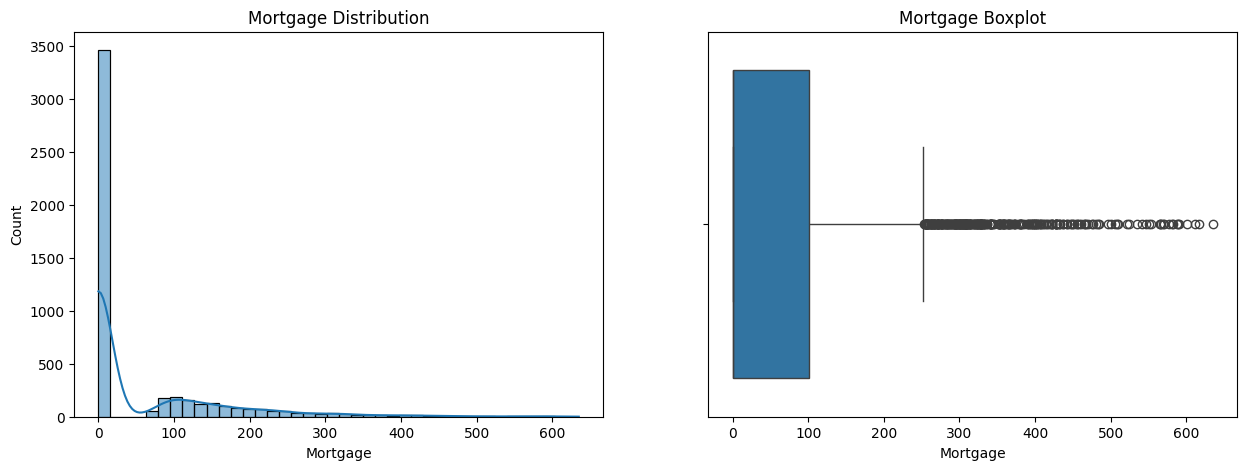

In [195]:
#print(df['Mortgage'].describe())
# count=5000, mean≈56.5, std≈101.7, min=0, max=635, median (50%)=0
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Mortgage'], bins=40, kde=True, ax=ax[0])
ax[0].set_title('Mortgage Distribution')

sns.boxplot(x=df['Mortgage'], ax=ax[1])
ax[1].set_title('Mortgage Boxplot')
plt.show()

### Observation
* AAAAA

### **2.** How many customers have credit cards?

### Observation
* AAAAA

### **3.** What are the attributes that have a strong correlation with the target attribute (personal loan)?

### Observation
* AAAAA

### **4.** How does a customer's interest in purchasing a loan vary with their age?

### Observation
* AAAAA

### **5.** How does a customer's interest in purchasing a loan vary with their education?

### Observation
* AAAAA

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___